<h1>Sentiment Analysis using Twitter API</h1>


In [10]:
!pip install tweepy==4.9.0

<h3>Twitter API keys</h3>

In [11]:
API_Key         = "xVETmU3M0z5s5ZcvrqTfKncR9"
API_Secret      = "Fhw6xKtogVDiM7FwWkhInoIQz4rQezGWnRVx2Dugkss6QXgJ6Q"
Bearer_Token    = "AAAAAAAAAAAAAAAAAAAAAMHuxAEAAAAAWXQDa%2F8Ips0lL5i7BCMJjToVIC4%3D403MM0lVJDzAxPbiJt7iTuYCWj2kH5vVzI38r2rIC6QYK3pFBO"
Access_Token    = "1710683992939470848-eWo3OqF7ffy2yeUwhx4o3bFRRjlFIg"
Access_Secret   = "hFyftL4XkDwvZjWS2t5JLFgCxvBQGR0XbS71choOuf7TI"


<h3>Importing required libraries</h3>

In [12]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vasal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
client = tweepy.Client(Bearer_Token)

<h3>Extracting tweets</h3>

In [14]:
query = '#apple -is:retweet lang:en'
paginator = tweepy.Paginator(
    client.search_recent_tweets,           # The method you want to use
    query=query,                           # Some argument for this method
    max_results=100,                       # How many tweets per page
    limit=10                              # How many pages to retrieve
)

In [15]:
tweet_list = []

for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

Screw you #Apple, you are not welcome in Indonesia. We like #Samsung more than you.

https://t.co/pxFqgFvsdw
Hey @Apple #Apple 
I'll let you take my icon arrangement duties over again if you fix your photos app dumpster fire.
@Apple completely f’d up my music files with their latest update. I can play them on my laptop but 25% of my 1000’s of songs purchased on itunes are un-playable. Great job on the QA #apple
Check out iPhone 14 Used Fully Functional https://t.co/2KsG1kdr38 #eBay via @eBay #iphone14 #sale #christmas #apple
Baidu has been confirmed as the provider of artificial intelligence models for Apple in China, marking a significant development in the landscape of international technology collaborations. 

#Apple #AppleIntelligence #Baidu

https://t.co/0uXsPnLD9m
@Apple and Baidu team up to boost AI features for Chinese iPhone users. However, challenges remain in adapting Baidu's language models for a seamless experience. 

#apple #iphone #baidu #ai 
https://t.co/Ob8jvXdf2V
@eni

TooManyRequests: 429 Too Many Requests
Too Many Requests

<h3>Creating Data Frame for Extracted Tweets</h3>

In [16]:
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,"Screw you #Apple, you are not welcome in Indon..."
1,Hey @Apple #Apple \nI'll let you take my icon ...
2,@Apple completely f’d up my music files with t...
3,Check out iPhone 14 Used Fully Functional http...
4,Baidu has been confirmed as the provider of ar...


In [17]:
tweet_list_df.to_csv('appletweets.csv', index=False) 

<h3>Function to Clean Tweets</h3>

In [18]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:11: SyntaxWarning: invalid escape sequence '\w'
C:\Users\vasal\AppData\Local\Temp\ipykernel_11288\1125281311.py:8: SyntaxWarning: invalid escape sequence '\w'
  sentence = re.sub('RT @\w+: '," ", sentence)
C:\Users\vasal\AppData\Local\Temp\ipykernel_11288\1125281311.py:11: SyntaxWarning: invalid escape sequence '\w'
  sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)


In [19]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [20]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,"Screw you #Apple, you are not welcome in Indon...",screw you apple you are not welcome in indones...
1,Hey @Apple #Apple \nI'll let you take my icon ...,hey apple ll let you take my icon arrangement ...
2,@Apple completely f’d up my music files with t...,completely d up my music files with their lat...
3,Check out iPhone 14 Used Fully Functional http...,check out iphone 14 used fully functional ebay...
4,Baidu has been confirmed as the provider of ar...,baidu has been confirmed as the provider of ar...


<h3>Assigning polarity and subjectivity </h3>

In [21]:
tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [22]:
tweet_list_df

,text,cleaned,polarity,subjectivity
0,"Screw you #Apple, you are not welcome in Indon...",screw you apple you are not welcome in indones...,0.050000,0.700000
1,Hey @Apple #Apple \nI'll let you take my icon ...,hey apple ll let you take my icon arrangement ...,0.000000,0.000000
2,@Apple completely f’d up my music files with t...,completely d up my music files with their lat...,0.466667,0.683333
3,Check out iPhone 14 Used Fully Functional http...,check out iphone 14 used fully functional ebay...,0.000000,0.000000
4,Baidu has been confirmed as the provider of ar...,baidu has been confirmed as the provider of ar...,0.043750,0.718750
...,...,...,...,...
95,2024’s music scene has crowned its champion on...,2024 music scene has crowned its champion on s...,0.500000,0.500000
96,#Apple’s Display-Equipped #HomePod Coming in L...,apple display equipped homepod coming in late...,-0.300000,0.600000
97,#Apple #iOS18 I found it confusing that Apple ...,apple ios18 found it confusing that apple bun...,0.168750,0.568750
98,"Apple's market cap soars to $3.67T, Tesla surg...",apple market cap soars to 3 67t tesla surges 4...,0.350000,0.550000


In [24]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [26]:
for index, row in tweet_list_df['cleaned'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

In [28]:
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"Screw you #Apple, you are not welcome in Indon...",screw you apple you are not welcome in indones...,0.050000,0.700000,negative,0.211,0.653,0.136,-0.0976
1,Hey @Apple #Apple \nI'll let you take my icon ...,hey apple ll let you take my icon arrangement ...,0.000000,0.000000,negative,0.182,0.818,0.000,-0.4588
2,@Apple completely f’d up my music files with t...,completely d up my music files with their lat...,0.466667,0.683333,positive,0.000,0.813,0.187,0.8100
3,Check out iPhone 14 Used Fully Functional http...,check out iphone 14 used fully functional ebay...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,Baidu has been confirmed as the provider of ar...,baidu has been confirmed as the provider of ar...,0.043750,0.718750,positive,0.000,0.841,0.159,0.5994


In [29]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

In [30]:
tweet_list_df_negative

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,"Screw you #Apple, you are not welcome in Indon...",screw you apple you are not welcome in indones...,0.050000,0.700000,negative,0.211,0.653,0.136,-0.0976
1,Hey @Apple #Apple \nI'll let you take my icon ...,hey apple ll let you take my icon arrangement ...,0.000000,0.000000,negative,0.182,0.818,0.000,-0.4588
12,Can we all just agree that the obnoxiously lou...,can we all just agree that the obnoxiously lou...,-0.266667,0.622222,negative,0.330,0.595,0.074,-0.8625
13,#Apple has been cunning ppl into buying more s...,apple has been cunning ppl into buying more s...,0.047273,0.650909,negative,0.143,0.857,0.000,-0.5423
14,The Apple Savings APY falls again after anothe...,the apple savings apy falls again after anothe...,0.068182,0.377273,negative,0.156,0.778,0.067,-0.3400
23,📱 #Apple Card Savings #Account Rate Cut Again\...,apple card savings account rate cut again,0.000000,0.000000,negative,0.259,0.741,0.000,-0.2732
25,An alleged donation theft scheme involving six...,an alleged donation theft scheme involving six...,-0.050000,0.050000,negative,0.140,0.769,0.091,-0.1779
29,"@AppleSupport, some rogue app is misbehaving.\...",some rogue app is misbehaving so strange to p...,-0.041667,0.600000,negative,0.140,0.860,0.000,-0.6207
32,@Apple #farce #joke #apple #iphone #notbeback ...,farce joke apple iphone notbeback salute to t...,-0.200000,0.428571,negative,0.170,0.692,0.138,-0.1280
35,@Apple revert iOS 18.1.1 my phone 11 crashes a...,revert ios 18 1 1 my phone 11 crashes all the...,0.400000,0.900000,negative,0.182,0.741,0.077,-0.4767


In [31]:
tweet_list_df_positive

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
2,@Apple completely f’d up my music files with t...,completely d up my music files with their lat...,0.466667,0.683333,positive,0.000,0.813,0.187,0.8100
4,Baidu has been confirmed as the provider of ar...,baidu has been confirmed as the provider of ar...,0.043750,0.718750,positive,0.000,0.841,0.159,0.5994
5,@Apple and Baidu team up to boost AI features ...,and baidu team up to boost ai features for ch...,0.050000,0.050000,positive,0.000,0.862,0.138,0.4588
6,@enilev @_bella_webb @mvollmer1 @BetaMoroney @...,bella webb almani textile exchange tackles fa...,0.000000,0.066667,positive,0.000,0.870,0.130,0.6249
7,#Apple faces a #SalesBan in #Indonesia due to ...,apple faces salesban in indonesia due to the ...,0.041667,0.425000,positive,0.000,0.878,0.122,0.5106
8,#Apple is diversifying #production away from #...,apple is diversifying production away from ch...,0.000000,0.000000,positive,0.000,0.901,0.099,0.5267
10,DID U LIKE UR #spotifywrapped2024 result?\n\n#...,did like ur spotifywrapped2024 result apple ta...,0.000000,0.000000,positive,0.000,0.857,0.143,0.3612
11,"""Stay in touch with ease and style."" 🤩😍\nKYTES...",stay in touch with ease and style kytes r3 el...,0.000000,0.000000,positive,0.000,0.841,0.159,0.6249
17,One of my favorite #quotes of all time. Incred...,one of my favorite quotes of all time incredib...,0.425000,0.825000,positive,0.000,0.681,0.319,0.7264
18,My dream reward is: \nHaving some valuable tec...,my dream reward is having some valuable tech i...,0.000000,0.000000,positive,0.000,0.556,0.444,0.8316


<h3>Analysing the positive,negative and neutral percentages</h3>

In [32]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [33]:
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
sentiment,,
positive,47,47.0
neutral,34,34.0
negative,19,19.0


In [35]:
type(tweet_list_df['cleaned'])

pandas.core.series.Series

In [55]:
total_comments_positive = ' '.join(tweet_list_df_positive['cleaned'])

<h3>creating positive wordcloud</h3>

In [56]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

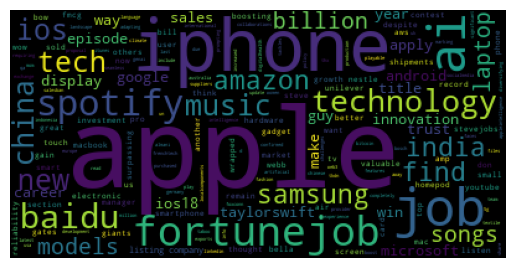

In [57]:
plt.imshow(wordcloud)
plt.axis('off')

In [58]:
total_comments_negative = ' '.join(tweet_list_df_negative['cleaned'])

<h3>creating negative wordcloud</h3>

In [59]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

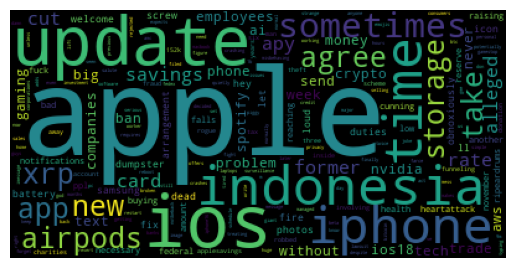

In [60]:
plt.imshow(wordcloud)
plt.axis('off')

In [62]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [63]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,152.68
neutral,123.32
positive,153.89


In [64]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,26.63
neutral,18.76
positive,24.55


In [65]:
tweet_list_df

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,"Screw you #Apple, you are not welcome in Indon...",screw you apple you are not welcome in indones...,0.050000,0.700000,negative,0.211,0.653,0.136,-0.0976,79,15
1,Hey @Apple #Apple \nI'll let you take my icon ...,hey apple ll let you take my icon arrangement ...,0.000000,0.000000,negative,0.182,0.818,0.000,-0.4588,105,20
2,@Apple completely f’d up my music files with t...,completely d up my music files with their lat...,0.466667,0.683333,positive,0.000,0.813,0.187,0.8100,172,35
3,Check out iPhone 14 Used Fully Functional http...,check out iphone 14 used fully functional ebay...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,80,13
4,Baidu has been confirmed as the provider of ar...,baidu has been confirmed as the provider of ar...,0.043750,0.718750,positive,0.000,0.841,0.159,0.5994,216,28
...,...,...,...,...,...,...,...,...,...,...,...
95,2024’s music scene has crowned its champion on...,2024 music scene has crowned its champion on s...,0.500000,0.500000,positive,0.000,0.749,0.251,0.6908,116,19
96,#Apple’s Display-Equipped #HomePod Coming in L...,apple display equipped homepod coming in late...,-0.300000,0.600000,neutral,0.000,1.000,0.000,0.0000,61,10
97,#Apple #iOS18 I found it confusing that Apple ...,apple ios18 found it confusing that apple bun...,0.168750,0.568750,positive,0.060,0.849,0.091,0.2500,166,29
98,"Apple's market cap soars to $3.67T, Tesla surg...",apple market cap soars to 3 67t tesla surges 4...,0.350000,0.550000,neutral,0.000,1.000,0.000,0.0000,183,35


<h3>Creating countplot</h3>

C:\Users\vasal\AppData\Local\Temp\ipykernel_11288\2558106060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=tweet_list_df, palette='coolwarm')


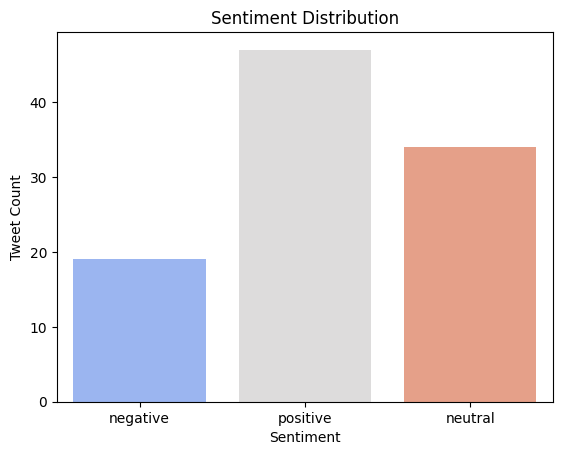

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment', data=tweet_list_df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()


<h3>Creating wordcloud for cleaned Tweets</h3>

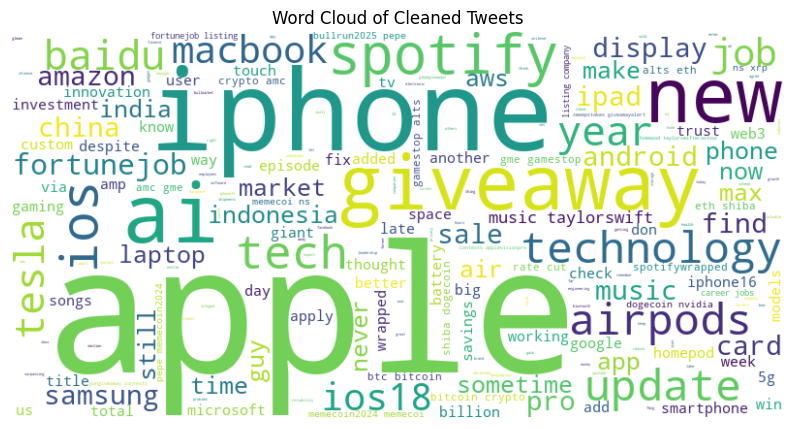

In [67]:
from wordcloud import WordCloud

all_words = ' '.join(tweet_list_df['cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Tweets')
plt.show()


<h3>Creating Scatter Plot</h3>

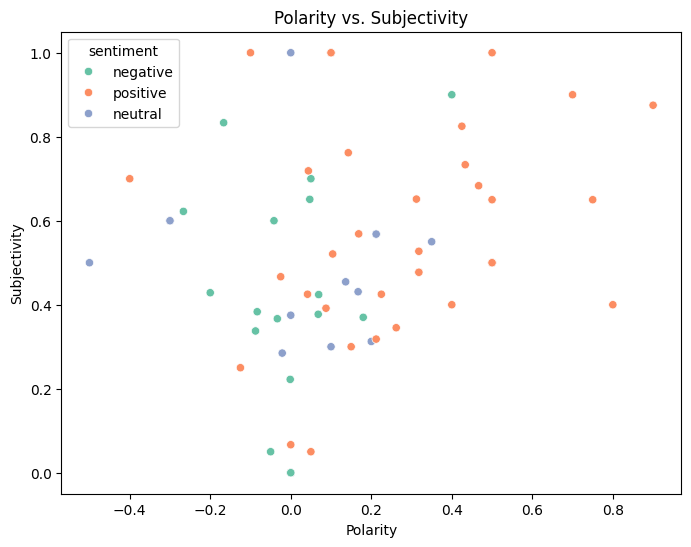

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='polarity', y='subjectivity', hue='sentiment', data=tweet_list_df, palette='Set2')
plt.title('Polarity vs. Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


<h3>Creating a Histogram</h3>

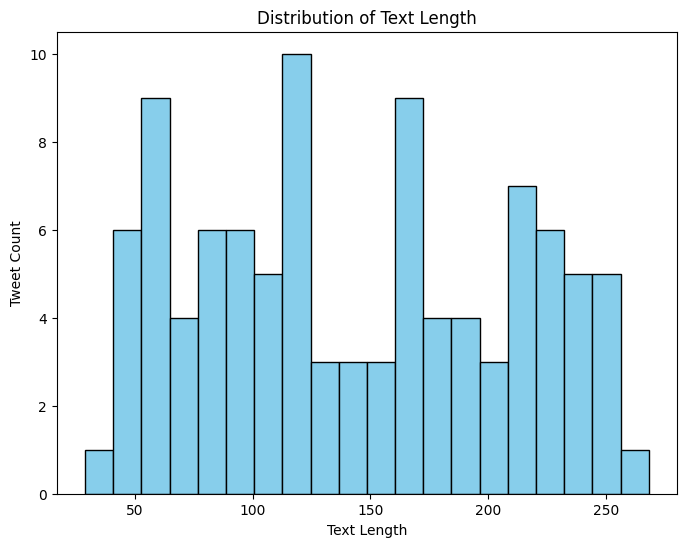

In [70]:
plt.figure(figsize=(8, 6))
plt.hist(tweet_list_df['text_len'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Tweet Count')
plt.show()


<h3>Creating a Boxplot</h3>

C:\Users\vasal\AppData\Local\Temp\ipykernel_11288\1823775057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='text_word_count', data=tweet_list_df, palette='Pastel1')


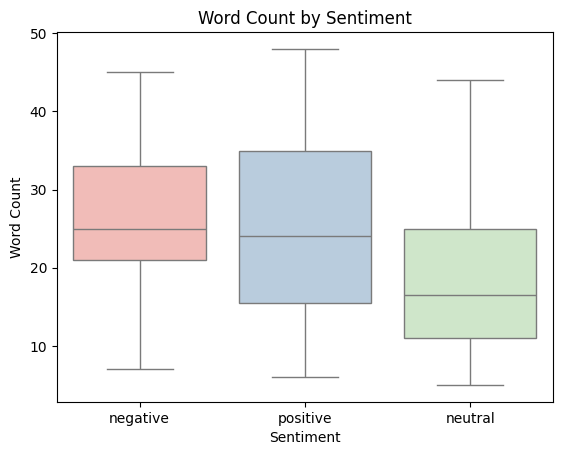

In [71]:
sns.boxplot(x='sentiment', y='text_word_count', data=tweet_list_df, palette='Pastel1')
plt.title('Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()


<h3>kernel density estimate</h3>

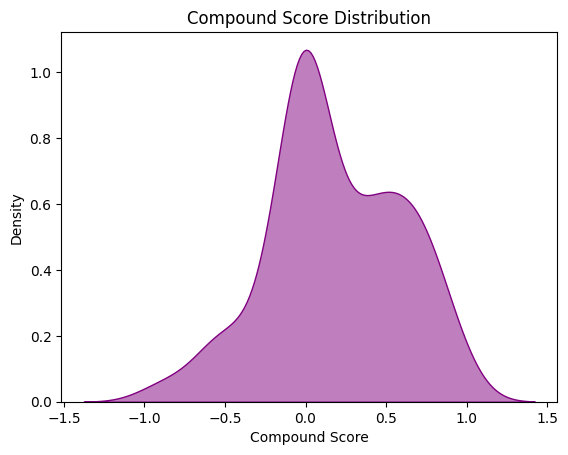

In [72]:
sns.kdeplot(tweet_list_df['compound'], fill=True, color='purple', alpha=0.5)
plt.title('Compound Score Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.show()


In [76]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vasal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

<h3>Barchart with stop words</h3>

In [79]:
import nltk.data
print(nltk.data.find('tokenizers/punkt'))



C:\Users\vasal\AppData\Roaming\nltk_data\tokenizers\punkt


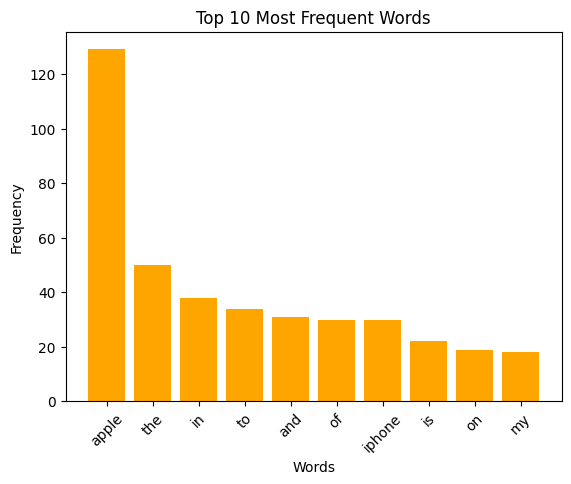

In [81]:
from collections import Counter

# Use basic splitting as an alternative
words = [word for text in tweet_list_df['cleaned'] for word in text.split()]
word_freq = Counter(words)
most_common = word_freq.most_common(10)

# Visualize
import matplotlib.pyplot as plt

words, counts = zip(*most_common)
plt.bar(words, counts, color='orange')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


<h3>Barchart with meaningful stop words</h3>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vasal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


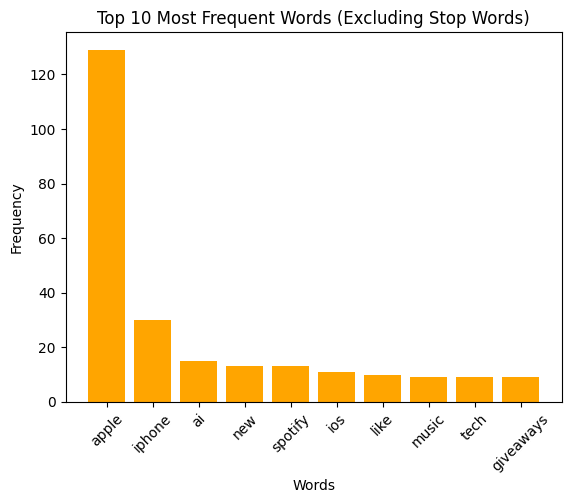

In [82]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words
stop_words = set(stopwords.words('english'))

# Filter stop words from the cleaned text
words = [
    word.lower() 
    for text in tweet_list_df['cleaned'] 
    for word in text.split() 
    if word.lower() not in stop_words
]

# Count word frequencies
word_freq = Counter(words)
most_common = word_freq.most_common(10)

# Plot the most common words
words, counts = zip(*most_common)
plt.bar(words, counts, color='orange')
plt.title('Top 10 Most Frequent Words (Excluding Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


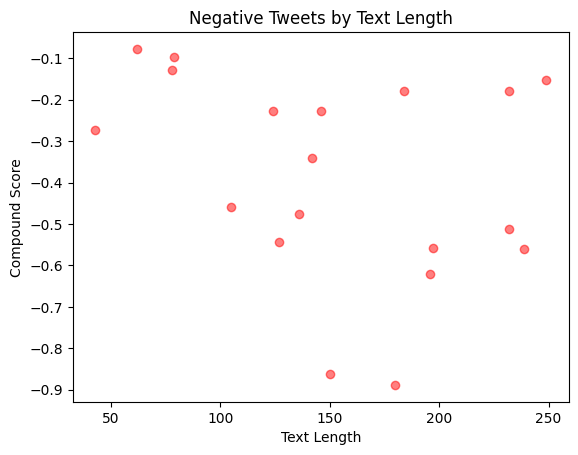

In [74]:
neg_tweets = tweet_list_df[tweet_list_df['sentiment'] == 'negative']

plt.scatter(neg_tweets['text_len'], neg_tweets['compound'], color='red', alpha=0.5)
plt.title('Negative Tweets by Text Length')
plt.xlabel('Text Length')
plt.ylabel('Compound Score')
plt.show()


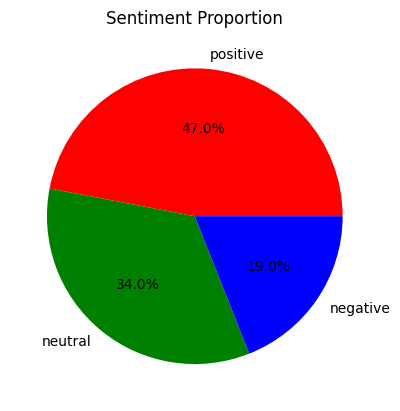

In [75]:
sentiment_counts = tweet_list_df['sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'green', 'blue'])
plt.title('Sentiment Proportion')
plt.show()


<h2>Save the data frame to CSV file</h2>

In [84]:
tweet_list_df.to_csv("./c2_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')

In [85]:
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,"Screw you #Apple, you are not welcome in Indon...",screw you apple you are not welcome in indones...,0.050000,0.700000,negative,0.211,0.653,0.136,-0.0976,79,15
1,Hey @Apple #Apple \nI'll let you take my icon ...,hey apple ll let you take my icon arrangement ...,0.000000,0.000000,negative,0.182,0.818,0.000,-0.4588,105,20
2,@Apple completely f’d up my music files with t...,completely d up my music files with their lat...,0.466667,0.683333,positive,0.000,0.813,0.187,0.8100,172,35
3,Check out iPhone 14 Used Fully Functional http...,check out iphone 14 used fully functional ebay...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,80,13
4,Baidu has been confirmed as the provider of ar...,baidu has been confirmed as the provider of ar...,0.043750,0.718750,positive,0.000,0.841,0.159,0.5994,216,28
